In [2]:
import pandas as pd
sentiments = pd.read_csv('overall_sentiment.csv')


In [63]:
frequencies = sentiments.iloc[:, 0].value_counts()
frequencies = frequencies.to_dict()

In [50]:
#cluster average sentiment vs. frequency of mention 

queries = []
for i in frequencies.keys():
    queries.append(i)
    
avg_sentiments = []
for query in queries:
    avg_sentiment = sentiments.loc[sentiments['query'] == '{}'.format(query)]['compound'].mean()
    avg_sentiments.append(avg_sentiment)

cluster1_df = pd.concat([pd.DataFrame(frequencies.items()), pd.DataFrame(avg_sentiments)], axis=1)
cluster1_df.columns = ['query', 'freq', 'avg_sent']
cluster1_df

,query,freq,avg_sent
0,#BlackFriday,1000,0.254605
1,Climate Change,1000,0.094494
2,Cyber Monday,608,0.226467
3,#ClimateChange,475,0.161200
4,Buy Local,459,0.355473
5,Sustainability,412,0.270081
6,#SmallBusinessSaturday,337,0.452181
7,No Black Friday,334,-0.030234
8,Black Friday,284,0.179345
9,#CyberMonday,235,0.277727


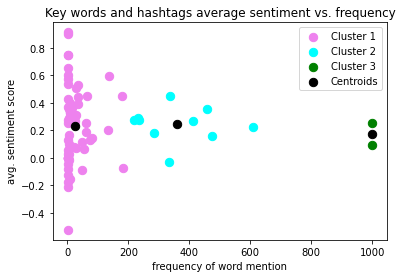

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

X = cluster1_df[['freq', 'avg_sent']].values

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Key words and hashtags average sentiment vs. frequency')
plt.xlabel('frequency of word mention')
plt.ylabel('avg. sentiment score')
plt.legend()
plt.savefig('cluster.png')
plt.show()